# Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git
# One should uncomment the above command if running for the first time
# I have already cloned the directory so, I have commented out the command

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 28.91 MiB/s, done.
Updating files: 100% (2295/2295), done.


In [7]:
#set the path to the main directory
import os
main_dir = '/content/datasets/Data'
# The '\' were getting interpreted as escape sequence when I ran the code on local machine
# So, instead of using just the string, we used raw string r''

#set the path to the train directory
train_dir = os.path.join(main_dir, 'train')

#set the path to the test directory
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [9]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10], end='\n\n')

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10], end='\n\n')

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10], end='\n\n')

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (269).jpg', 'COVID19(485).jpg', 'COVID19(173).jpg', 'COVID19(80).jpg', 'COVID19(42).jpg', 'COVID19(143).jpg', 'COVID19(282).jpg', 'COVID-19 (16).jpg', 'COVID19(111).jpg', 'COVID19(528).jpg']

['NORMAL(651).jpg', 'NORMAL(630).jpg', 'NORMAL(1364).jpg', 'NORMAL(1341).jpg', 'NORMAL(325).jpg', 'NORMAL(1199).jpg', 'NORMAL(1379).jpg', 'NORMAL(280).jpg', 'NORMAL(468).jpg', 'NORMAL(573).jpg']

['COVID19(285).jpg', 'COVID19(34).jpg', 'COVID-19 (865).jpg', 'COVID19(490).jpg', 'COVID19(521).jpg', 'COVID-19 (871).jpg', 'COVID-19 (516).jpg', 'COVID19(437).jpg', 'COVID19(183).jpg', 'COVID19(63).jpg']

['NORMAL(540).jpg', 'NORMAL(486).jpg', 'NORMAL(889).jpg', 'NORMAL(625).jpg', 'NORMAL(491).jpg', 'NORMAL(359).jpg', 'NORMAL(539).jpg', 'NORMAL(835).jpg', 'NORMAL(471).jpg', 'NORMAL(564).jpg']


In [10]:
#print the total no of images present in each dir
print('Total images present in training set: ', len(train_covid_names+train_normal_names), end='\n\n')
print('Total images present in test set: ', len(test_covid_names+test_normal_names))


Total images present in training set:  1811

Total images present in test set:  484


# Data Visualization

In [11]:
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[:8]]
#print the list
print(covid_pic)
print()
print(normal_pic)


['/content/datasets/Data/train/COVID19/COVID-19 (269).jpg', '/content/datasets/Data/train/COVID19/COVID19(485).jpg', '/content/datasets/Data/train/COVID19/COVID19(173).jpg', '/content/datasets/Data/train/COVID19/COVID19(80).jpg', '/content/datasets/Data/train/COVID19/COVID19(42).jpg', '/content/datasets/Data/train/COVID19/COVID19(143).jpg', '/content/datasets/Data/train/COVID19/COVID19(282).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (16).jpg']

['/content/datasets/Data/train/NORMAL/NORMAL(651).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(630).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1364).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1341).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(325).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1199).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1379).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(280).jpg']


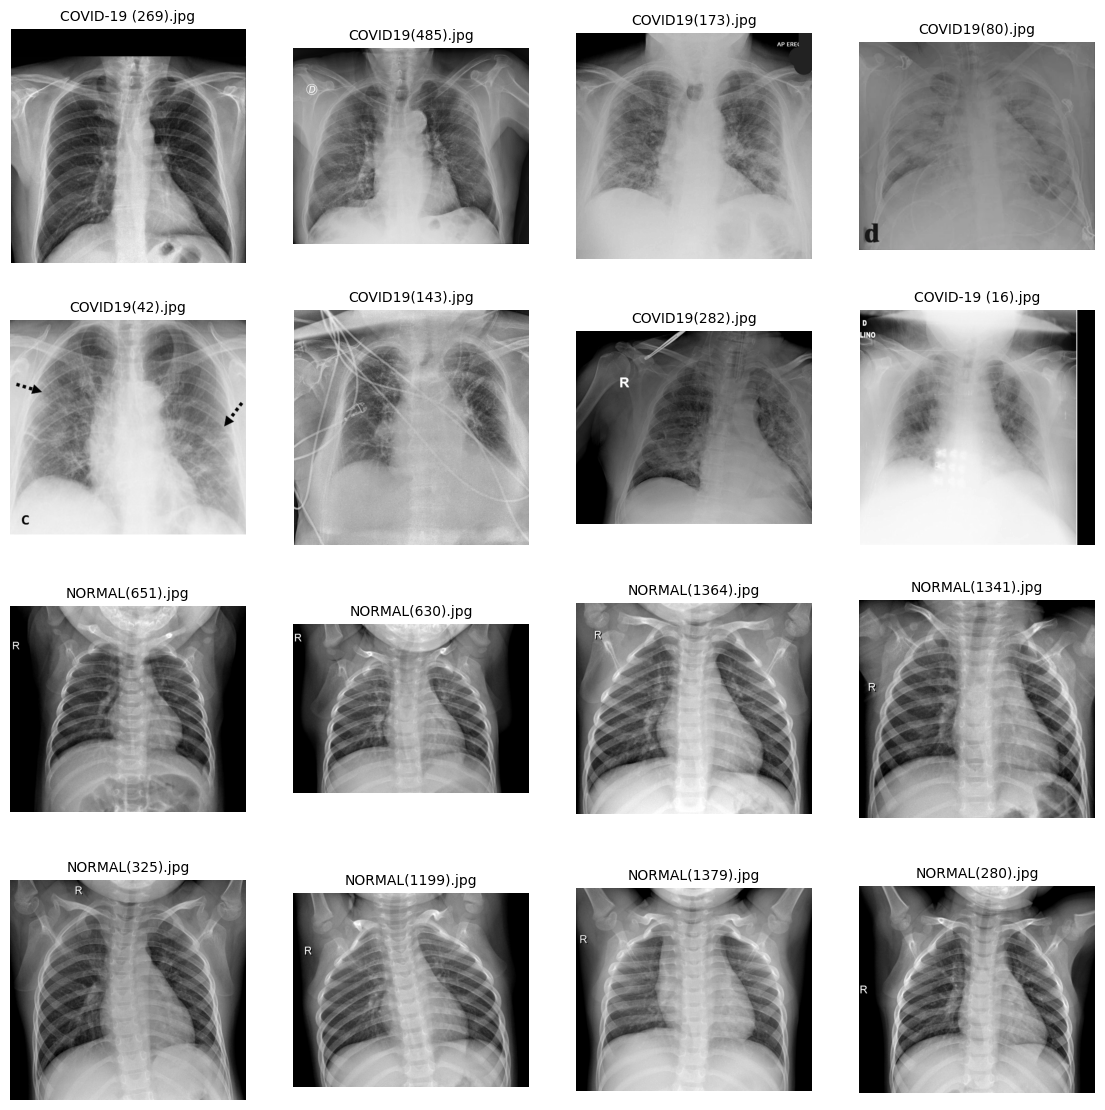

In [14]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(14, 14)

#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i, img_path in enumerate(merged_list):
    data = img_path.split('/')[-1]
    sp = plt.subplot(rows, cols, i+1)
    sp.axis('off')
    img = mpimg.imread(img_path)
    sp.set_title(data, fontsize = 10)
    plt.imshow(img, cmap= 'gray')
plt.show();

# Data Preprocessing & Augmentation

In [42]:

import tensorflow

In [43]:
np.random.seed(10)
tensorflow.random.set_seed(10)

In [44]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [45]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [46]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# Build Convolutional Neural Network Model

In [47]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,
                 (5,5),
                 padding = 'SAME',
                 activation = 'relu',
                 input_shape = (150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# add another convolutional layer
model.add(Conv2D(64,
                 (5,5),
                 padding = 'SAME',
                 activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      22,429,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

# Compile & Train the Model

In [48]:
#compile the model
model.compile(Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [49]:
#train the model
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.6632 - loss: 3.4427 - val_accuracy: 0.7707 - val_loss: 0.5273
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.8473 - loss: 0.3339 - val_accuracy: 0.9392 - val_loss: 0.2239
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - accuracy: 0.9177 - loss: 0.2455 - val_accuracy: 0.9475 - val_loss: 0.1563
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 211s 4s/step - accuracy: 0.9448 - loss: 0.1622 - val_accuracy: 0.9503 - val_loss: 0.2110
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.9500 - loss: 0.1638 - val_accuracy: 0.9641 - val_loss: 0.1326


# Performance Evaluation

In [57]:
#get the keys of history object
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

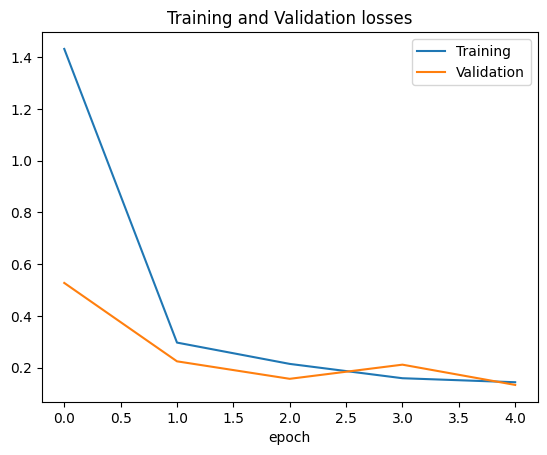

In [58]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch');

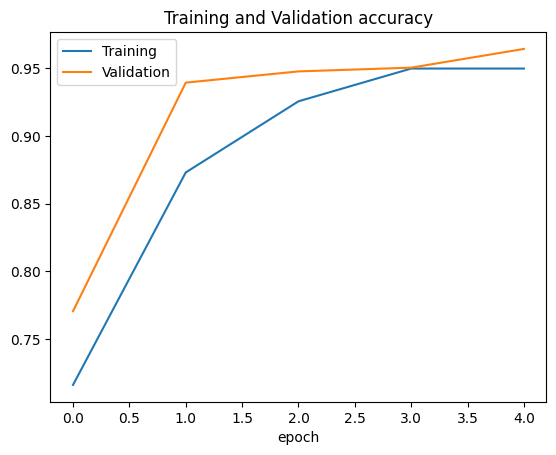

In [59]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch');

In [60]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print(f"test loss: {test_loss} and test acc: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9507 - loss: 0.1461
test loss: 0.14930422604084015 and test acc: 0.9462810158729553


# Prediction On New Data

In [62]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+ filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  print(filename, end = '\n\n')
  if prediction == 0:
    print("COVID-19 Detected\n")
    print("------------------------")
  else:
    print("Your report is normal\n")
    print("--------------------------")

Saving covid1.jpg to covid1 (3).jpg
Saving covid2.jpeg to covid2 (3).jpeg
Saving normal1.jpg to normal1 (3).jpg
Saving normal2.jpg to normal2 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
covid1 (3).jpg

COVID-19 Detected

------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
covid2 (3).jpeg

COVID-19 Detected

------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
normal1 (3).jpg

Your report is normal

--------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
normal2 (3).jpg

Your report is normal

--------------------------
